# Universidad del Valle de Guatemala
#### Ing. Luis Valdeavellano
#### Mineria de datos
##### Sección 20 
#### Grupo 8:
 - Mario Perdomo
 - Juan Diego Solorzano
 - Esteban Cabrera
 - Isabel Ortíz

# Proyecto Final

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_set = pd.read_csv("/content/heart.csv")

##Analisis Exploratorio

In [ ]:
data_set.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#Cantidad de datos, columnas
data_set.shape

(303, 14)

In [ ]:
#Cantidad de datos unicos en cada columna
dict = {}
for i in list(data_set.columns):
    dict[i] = data_set[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trestbps,49
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


In [ ]:
#Separamos la data continua de la categórica, y tambien separamos el target, siendo los pacientes que si tienen posibilidad de tener ataques corazones
cat_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
con_cols = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["output"]
print("Las columnas categoricas son : ", cat_cols)
print("Las columnas continuas o valores son de : ", con_cols)
print("El target que queremos predecir es :  ", target_col)

Las columnas categoricas son :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
Las columnas continuas o valores son de :  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
El target que queremos predecir es :   ['output']


In [ ]:
#Estatisticas de la columna continua/valores
data_set[con_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [ ]:
#Revisamos si hay datos Null
data_set.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#Media de cada columna con target = 0 y target = 1
data_set.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


<function matplotlib.pyplot.show>

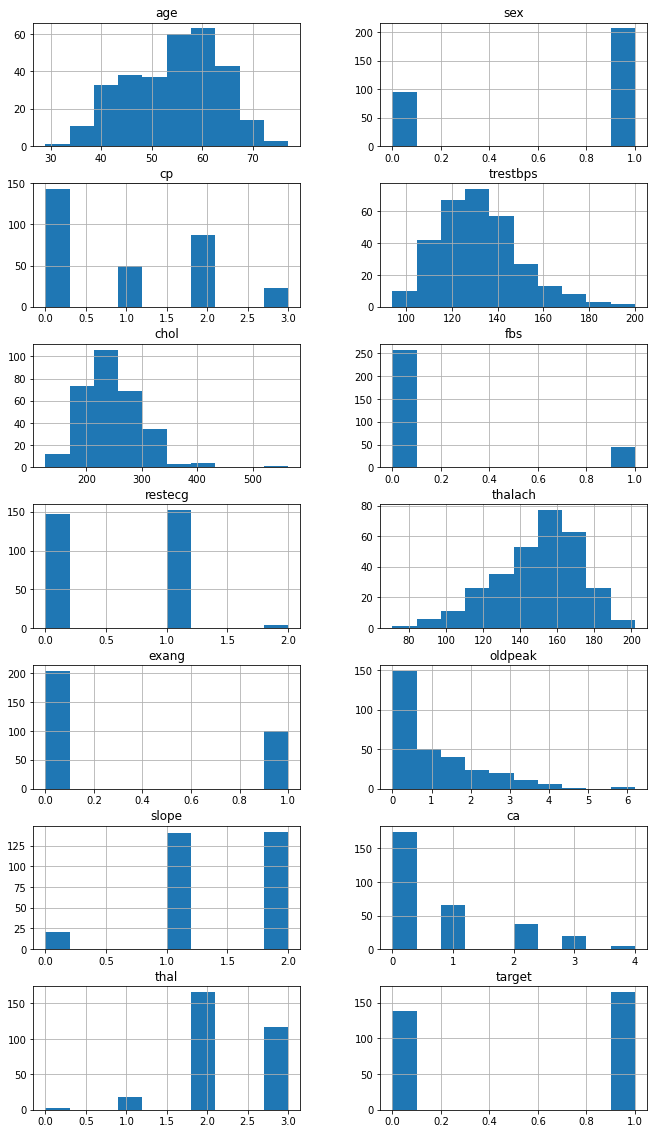

In [ ]:
#Creacion de graficas para visualizar cada columna del dataset
graph, axis = plt.subplots(7, 2, figsize=(11, 20))
data_set.hist(ax=axis)
plt.show

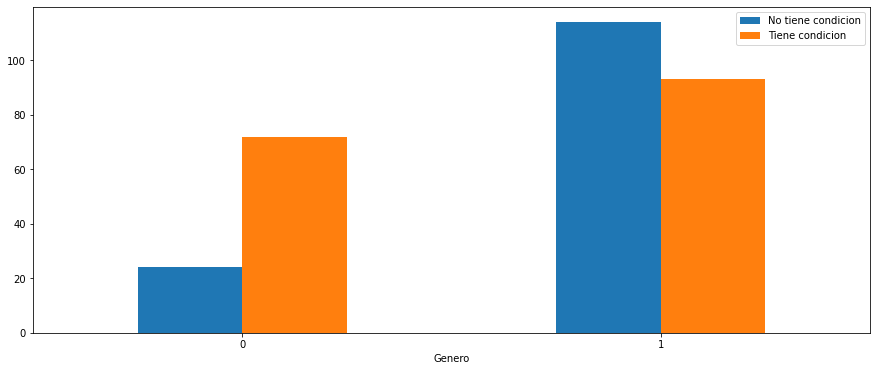

In [ ]:
#Tienen/No tienen condicion por genero
pd.crosstab(data_set.sex,data_set.target).plot(kind="bar",figsize=(15,6))
plt.xlabel('Genero')
plt.xticks(rotation=0)
plt.legend(["No tiene condicion", "Tiene condicion"])
plt.show()

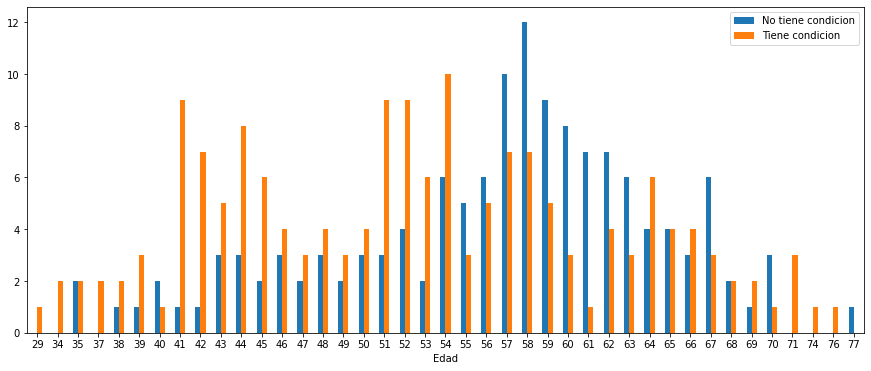

In [ ]:
#Tienen/No tienen condicion por edad
pd.crosstab(data_set.age,data_set.target).plot(kind="bar",figsize=(15,6))
plt.xlabel('Edad')
plt.xticks(rotation=0)
plt.legend(["No tiene condicion", "Tiene condicion"])
plt.show()

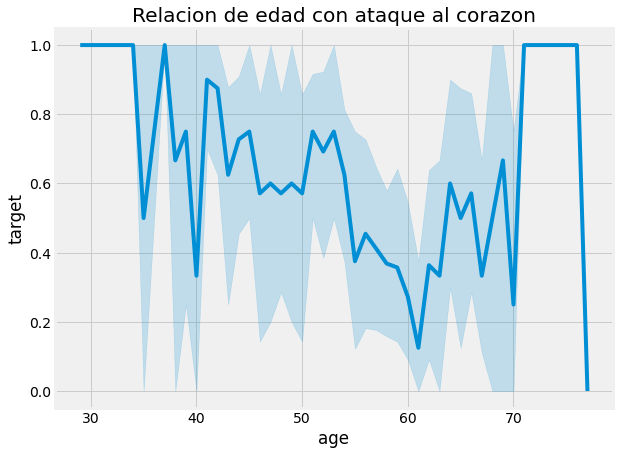

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Relación de edad con infartos")
sns.lineplot(x=data_set['age'],y=data_set['target'])

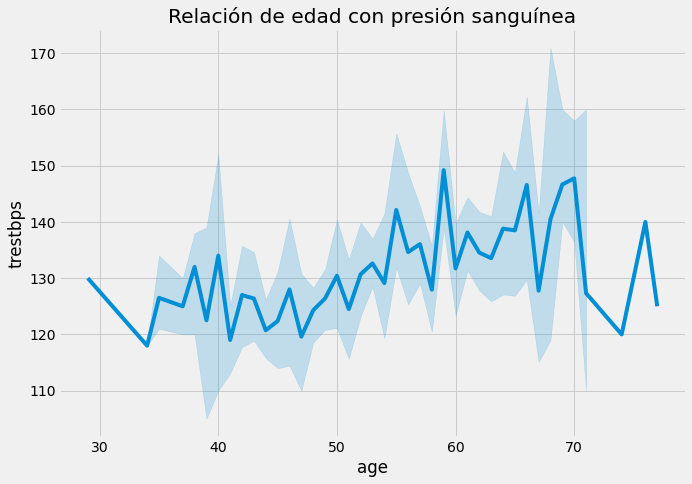

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Relación de edad con presión sanguínea")
sns.lineplot(x=data_set['age'],y=data_set['trestbps'])

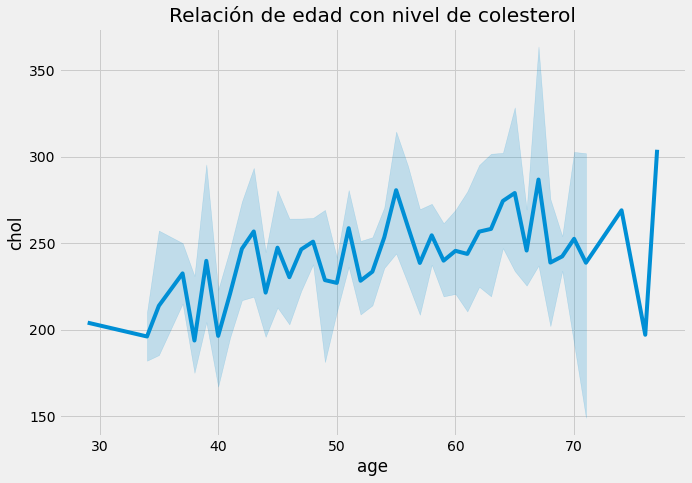

In [ ]:
plt.figure(figsize=(10,7))
plt.style.use("fivethirtyeight")
plt.title("Relación de edad con nivel de colesterol")
sns.lineplot(x=data_set['age'],y=data_set['chol'])

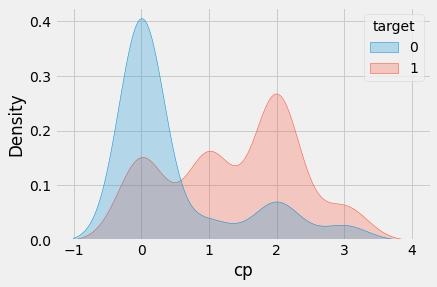

In [ ]:
sns.kdeplot(data=data_set, x='cp',hue="target", fill=True)

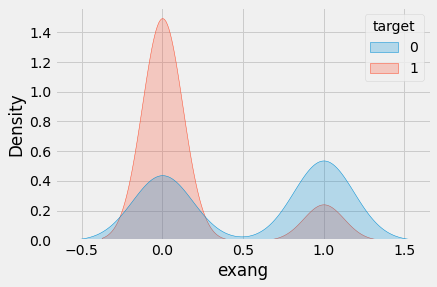

In [ ]:
sns.kdeplot(data=data_set, x='exang',hue="target", fill=True)

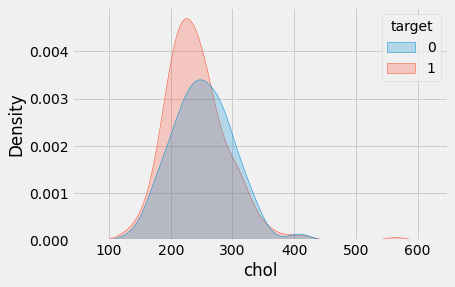

In [ ]:
sns.kdeplot( data=data_set, x='chol',hue="target",fill=True)

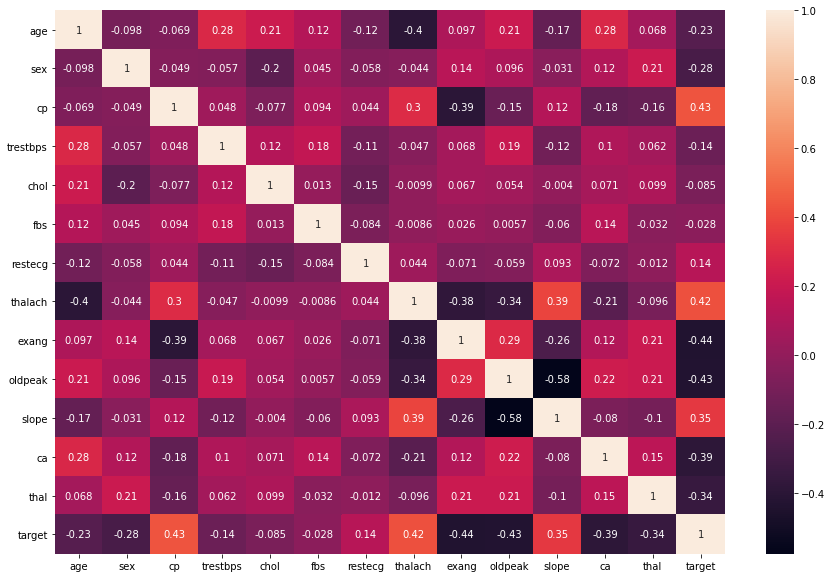

In [ ]:
#Heatmap de correlacion
plt.figure(figsize=(15,10))
sns.heatmap(data_set.corr(),annot=True)

##Preparacion de Datos

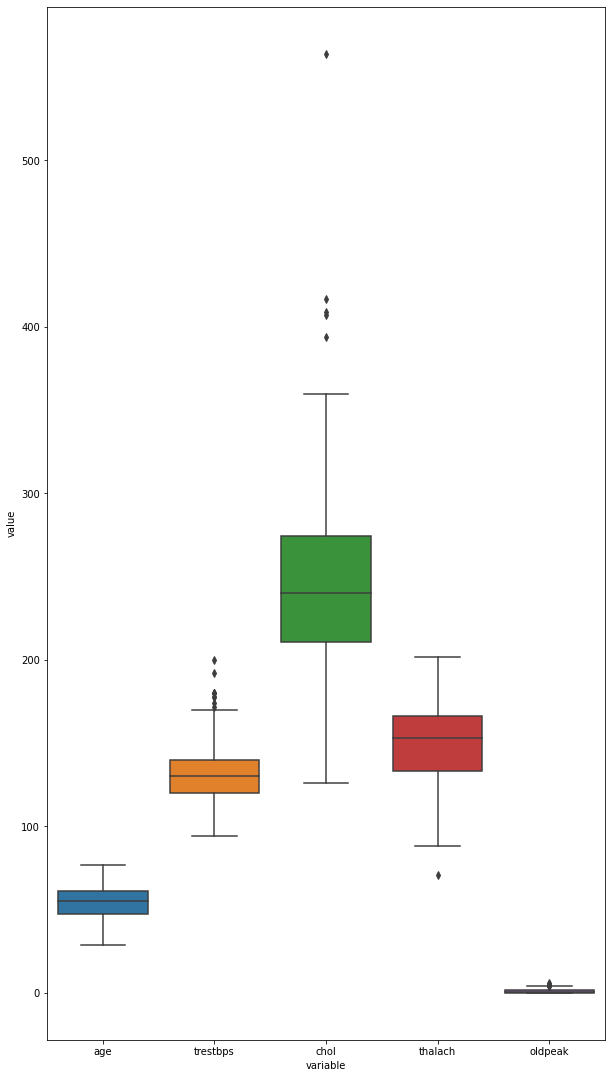

In [ ]:
#Ver outliers de columnas numericas
plt.figure(figsize=(10,19))
sns.boxplot(x="variable", y="value", data=pd.melt(data_set[con_cols]))
plt.show()

In [ ]:
#Detectar y eliminar outliers con el metodo z-score
from scipy import stats
z = np.abs(stats.zscore(data_set))
ds_outliers= data_set[(z >= 3.3).any(axis=1)]
print(ds_outliers.shape)

(8, 14)


In [ ]:
#Se modifica el intervalo de z para buscar un numero adecuado de filas a eliminar
#8 esta bien porque el dataset tiene 303 filas
ds2 = data_set[(z <3.3).all(axis=1)]
#print(ds2.shape)

In [ ]:
#One hot encoding para columnas categoricas con mas de 2 valores
dataPrep = pd.get_dummies(ds2,columns =['cp','restecg','slope','ca','thal'])

x = dataPrep.drop(['target'], axis=1)
y = dataPrep[['target']]

#Escalar columnas numericas
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
x[con_cols] = standardScaler.fit_transform(x[con_cols])



##Modelos

In [ ]:
#Importar modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
#Entrenar
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

accuracies = []

(236, 26)
(59, 26)
(236, 1)
(59, 1)


In [ ]:
#Logistic Regression
lgr = LogisticRegression()
lgr.fit(x_train, y_train)
lgr_pred = lgr.predict(x_test)
best = accuracy_score(y_test, lgr_pred)
print("El accuracy para Logistic Regression es ", best)
print(classification_report(y_test,lgr_pred))
accuracies.append(best)

El accuracy para Logistic Regression es  0.864406779661017
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.80      0.97      0.88        29

    accuracy                           0.86        59
   macro avg       0.88      0.87      0.86        59
weighted avg       0.88      0.86      0.86        59



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Random Forest
rf = RandomForestClassifier(random_state=1)
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
best = accuracy_score(y_test, rf_pred)
print("El accuracy para Random Forest es ", best)
print(classification_report(y_test,rf_pred))
accuracies.append(best)

El accuracy para Random Forest es  0.8305084745762712
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.77      0.93      0.84        29

    accuracy                           0.83        59
   macro avg       0.84      0.83      0.83        59
weighted avg       0.85      0.83      0.83        59



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#KNN
#Encontrar el mejor k (n_neighbors)
besti = 0
bestac = 0
bestpred = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_test)
    if accuracy_score(y_test, knn_pred) > bestac:
      bestac = accuracy_score(y_test, knn_pred)
      besti = i
      bestpred = knn_pred

print("El accuracy para KNN es ", bestac)
print(classification_report(y_test,bestpred))

accuracies.append(bestac)

El accuracy para KNN es  0.8983050847457628
              precision    recall  f1-score   support

           0       0.96      0.83      0.89        30
           1       0.85      0.97      0.90        29

    accuracy                           0.90        59
   macro avg       0.91      0.90      0.90        59
weighted avg       0.91      0.90      0.90        59



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was

In [ ]:
#SVM
svc = SVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
best = accuracy_score(y_test, svc_pred)
print("El accuracy para SVC es ", best)
print(classification_report(y_test,svc_pred))
accuracies.append(best)

El accuracy para SVC es  0.864406779661017
              precision    recall  f1-score   support

           0       0.96      0.77      0.85        30
           1       0.80      0.97      0.88        29

    accuracy                           0.86        59
   macro avg       0.88      0.87      0.86        59
weighted avg       0.88      0.86      0.86        59



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_pred = gnb.predict(x_test)
best = accuracy_score(y_test, gnb_pred)
print("El accuracy para Gaussian Naive Bayes es ", best)
print(classification_report(y_test,gnb_pred))
accuracies.append(best)

El accuracy para Gaussian Naive Bayes es  0.8305084745762712
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.88      0.76      0.81        29

    accuracy                           0.83        59
   macro avg       0.84      0.83      0.83        59
weighted avg       0.84      0.83      0.83        59



/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


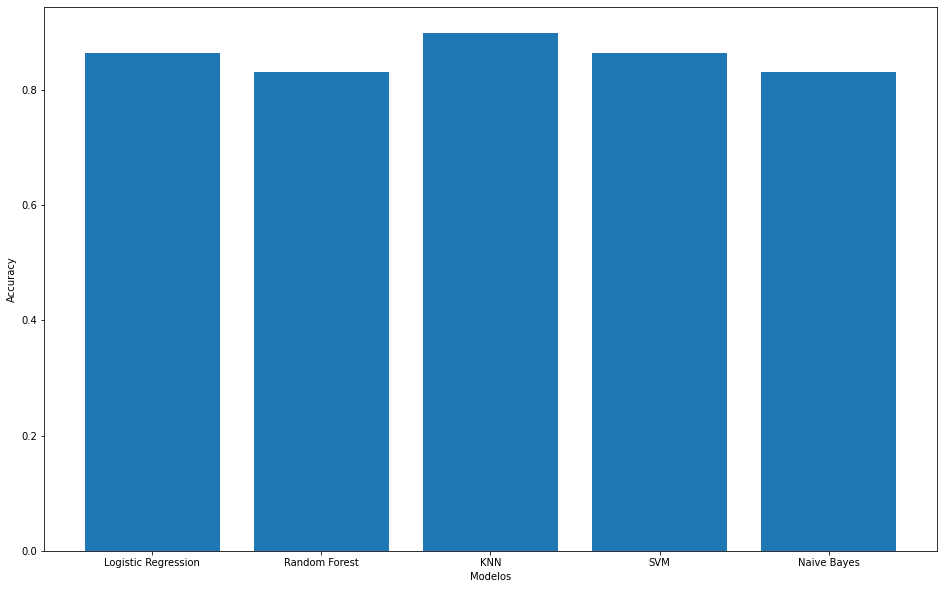

In [ ]:
#Comparacion de accuracy
models = ['Logistic Regression', 'Random Forest', 'KNN', 'SVM', 'Naive Bayes']

plt.figure(figsize=(16,10))
plt.ylabel("Accuracy")
plt.xlabel("Modelos")
plt.bar(models, accuracies)
plt.show()